## Homework 09

### MACS 30100 Perspectives on Computational Modeling, Dr. Soltoff

Ellen Hsieh

11 Mar 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

## Conceptual exercises

### Non-linear separation

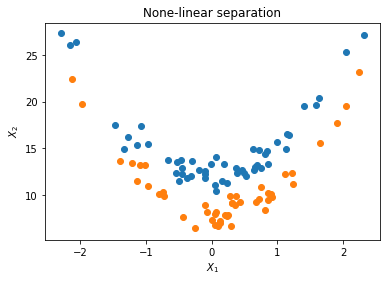

In [2]:
np.random.seed(124)

x1 = np.random.normal(0, 1, 100)
x2 = 3 * x1 ** 2 + 8 + np.random.normal(0, 1, 100)
y = np.random.binomial(1, 0.5, 100)
x2 += 4 * y

X = np.vstack((x1, x2)).T

plt.scatter(x1[y.astype(bool)], x2[y.astype(bool)])
plt.scatter(x1[~y.astype(bool)], x2[~y.astype(bool)])
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title('None-linear separation')
plt.show()

In [3]:
# reference: https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html 
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

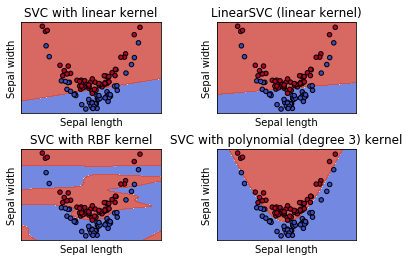

In [4]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
xx, yy = make_meshgrid(x1, x2)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [5]:
# calcualte error rate for different SVM models
for i in range(len(titles)):
    print('Error rate of {}: {:.2f}'.format(titles[i], (1 - models[i].score(X, y))))

Error rate of SVC with linear kernel: 0.16
Error rate of LinearSVC (linear kernel): 0.17
Error rate of SVC with RBF kernel: 0.03
Error rate of SVC with polynomial (degree 3) kernel: 0.01


According to the plots and the error rates showed above, polynomial (degree 3) kernel performs the best.

### SVM vs. logistic regression

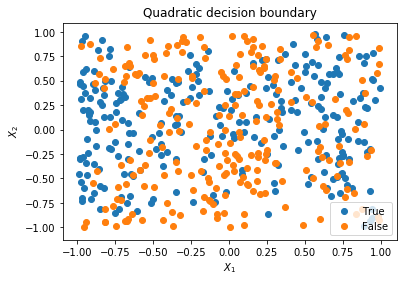

In [6]:
x1 = np.random.uniform(-1, 1, 500)
x2 = np.random.uniform(-1, 1, 500)
y = x1 ** 2 - x2 ** 2 + np.random.uniform(-1,1,500) > 0
X = np.vstack((x1, x2)).T

plt.scatter(x1[y.astype(bool)], x2[y.astype(bool)], label='True')
plt.scatter(x1[~y.astype(bool)], x2[~y.astype(bool)], label='False')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.title('Quadratic decision boundary')
plt.show()

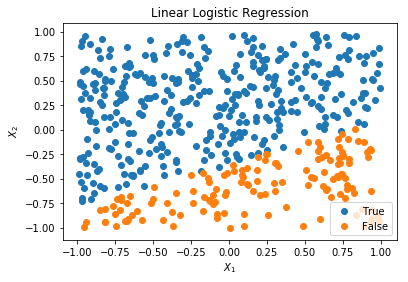

In [7]:
# predict and plot linear logistic regression
logit = LogisticRegression().fit(X, y)
logit_pred = logit.predict(X)

plt.scatter(x1[logit_pred.astype(bool)], x2[logit_pred.astype(bool)], label='True')
plt.scatter(x1[~logit_pred.astype(bool)], x2[~logit_pred.astype(bool)], label='False')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title('Linear Logistic Regression')
plt.legend()
plt.show()

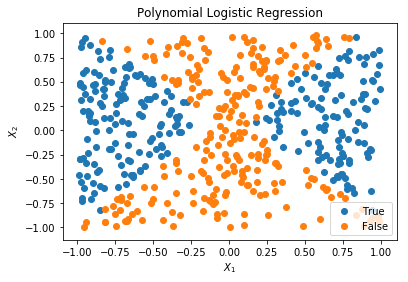

In [8]:
# predict and plot polynomial logistic regression
transform_X = PolynomialFeatures(2).fit_transform(X)
logit_poly = LogisticRegression().fit(transform_X, y)
poly_pred = logit_poly.predict(transform_X)

plt.scatter(x1[poly_pred.astype(bool)], x2[poly_pred.astype(bool)], label='True')
plt.scatter(x1[~poly_pred.astype(bool)], x2[~poly_pred.astype(bool)], label='False')
plt.title('Polynomial Logistic Regression')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.show()

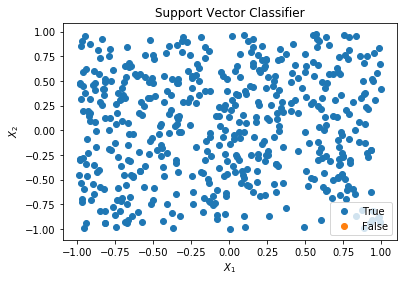

In [9]:
# predict and plot linear SVC
linear_svm = svm.SVC(kernel='linear').fit(X, y)
svm_pred = linear_svm.predict(X)

plt.scatter(x1[svm_pred.astype(bool)], x2[svm_pred.astype(bool)], label='True')
plt.scatter(x1[~svm_pred.astype(bool)], x2[~svm_pred.astype(bool)], label='False')
plt.title('Support Vector Classifier')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.show()

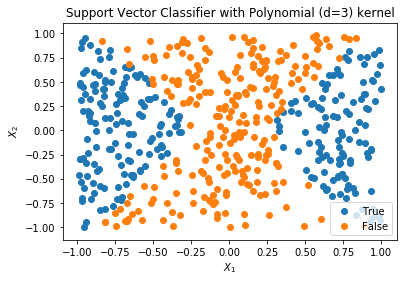

In [10]:
# predict and plot SVC with polynomial kernel
poly_svm = svm.SVC(kernel='poly', degree=2).fit(X, y)
poly_svm_pred = poly_svm.predict(X)

plt.scatter(x1[poly_svm_pred.astype(bool)], x2[poly_svm_pred.astype(bool)], label='True')
plt.scatter(x1[~poly_svm_pred.astype(bool)], x2[~poly_svm_pred.astype(bool)], label='False')
plt.title('Support Vector Classifier with Polynomial (d=3) kernel')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.show()

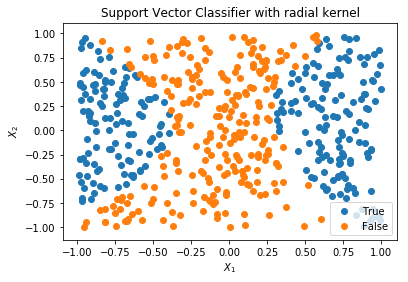

In [11]:
# predict and plot radial SVM
radial_svm = svm.SVC(kernel='rbf').fit(X, y)
r_svm_pred = radial_svm.predict(X)

plt.scatter(x1[r_svm_pred .astype(bool)], x2[r_svm_pred .astype(bool)], label='True')
plt.scatter(x1[~r_svm_pred .astype(bool)], x2[~r_svm_pred .astype(bool)], label='False')
plt.title('Support Vector Classifier with radial kernel')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.show()

According to the results above, both non-linear logistic regression and SVM with non-linear kernel perform well on correctly predicting the label of the training data. However, non-linear SVM is more computationally intensive, while using kernel SVC can get simialr outcome but more efficiently.

### Tuning the cost parameter

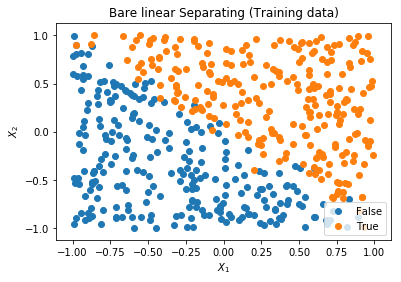

In [12]:
x1 = np.random.uniform(-1, 1, 500)
x2 = np.random.uniform(-1, 1, 500)
y = (x1 + x2 + np.random.normal(0, 0.1, 500)) > 0
X = np.array([x1, x2]).T

fig, ax = plt.subplots()

for group in np.unique(y):
    i = np.where(y == group)
    ax.scatter(x1[i], x2[i], label=group)

ax.legend()
plt.title('Bare linear Separating (Training data)')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

In [13]:
# calculate CV and train error rate of SVCs with different C
Cs = np.logspace(-2, 2, 10)
svm_lst = [svm.SVC(kernel='linear', C=c).fit(X, y) for c in Cs]
svm_cv_errs = [1 - (cross_val_score(model, X, y, cv=KFold(10), 
                                scoring='accuracy')).mean() for model in svm_lst]
svm_train_errs = [1 - model.score(X, y) for model in svm_lst]

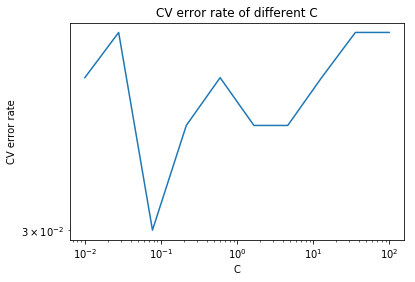

CV error rate of the optimal SVC with C=0.1 is 0.030


In [14]:
# plot CV error rate of SVCs with different C
plt.loglog(Cs, svm_cv_errs)
plt.title('CV error rate of different C')
plt.xlabel('C')
plt.ylabel('CV error rate')
plt.show()
print('CV error rate of the optimal SVC with C={:.1f} is {:.3f}'.format(Cs[np.argmin(svm_cv_errs)], np.min(svm_cv_errs)))

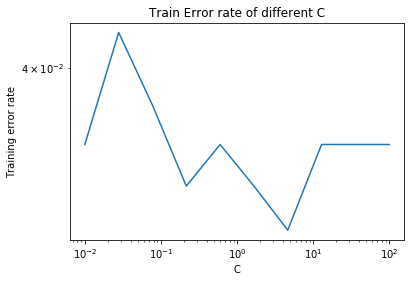

Train error rate of the optimal SVC with C=4.6 is 0.032


In [15]:
# plot train error rate of SVCs with different C
plt.loglog(Cs, svm_train_errs)
plt.title('Train Error rate of different C')
plt.xlabel('C')
plt.ylabel('Training error rate')
plt.show()
print('Train error rate of the optimal SVC with C={:.1f} is {:.3f}'.format(Cs[np.argmin(svm_train_errs)], np.min(svm_train_errs)))

When cost equals to 4.6, it seems to yield the smallest train error rate. As the cost increases until it hits the smallest error rate, the error rate tends to decrease. Also, the smallest train error rate is slightly larger than CV error rate. 

In [17]:
# generate test data set
test_x1 = np.random.uniform(-1, 1, 500)
test_x2 = np.random.uniform(-1, 1, 500)
test_X = np.vstack((test_x1, test_x2)).T
test_y = (test_x1 + test_x2) + np.random.normal(0, 0.1, 500) > 0

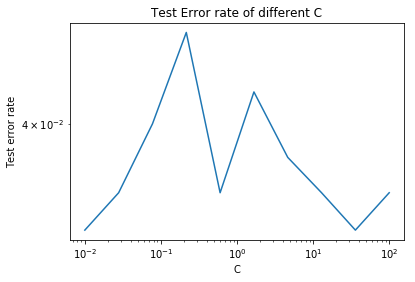

Test error rate of the optimal SVC with C=0.01 is 0.034


In [19]:
# calcaulate test error rate for SVMs
svm_test_errs = [1 - model.score(test_X, test_y) for model in svm_lst]
plt.loglog(Cs, svm_test_errs)
plt.xlabel('C')
plt.ylabel('Test error rate')
plt.title('Test Error rate of different C')
plt.show()
print('Test error rate of the optimal SVC with C={:.2f} is {:.3f}'.format(Cs[np.argmin(svm_test_errs)], np.min(svm_test_errs)))

As the cost become larger, the train error rates tends to decrease, thereby overfitting the train dataset. Although a small cost might lead to more misclassification but it can generalize the model better since it can prevent the model to be overfitted to the train dataset.

## Predicting attitudes towards racist college professors 

In [20]:
# load the data
gss_train = pd.read_csv('./data/gss_train.csv')
gss_test = pd.read_csv('./data/gss_test.csv')

# get training/testing dataset
x_train = gss_train.drop(['colrac'], axis=1).values
y_train = gss_train['colrac'].values
x_test = gss_test.drop(['colrac'], axis=1).values
y_test = gss_test['colrac'].values

In [21]:
# tuning C in linear SVC and calculate CV error rates
Cs = np.logspace(-2, 2, 5)
svm_lst = [svm.SVC(kernel='linear', C=c) for c in Cs]
svm_cv_errs = [1 - (cross_val_score(model, x_train, y_train, cv=KFold(10), scoring='accuracy')).mean() for model in svm_lst]

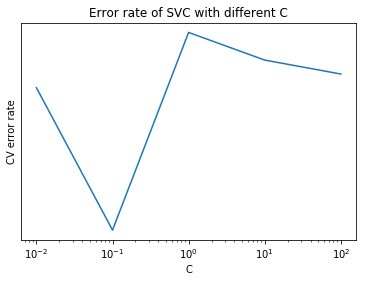

Error rate of optimal C: 0.20055


In [31]:
plt.loglog(Cs, svm_cv_errs)
plt.title('Error rate of SVC with different C')
plt.xlabel('C')
plt.ylabel('CV error rate')
plt.show()
print('Error rate of optimal C: {:.5f}'.format(min(svm_cv_errs)))

In [23]:
# tuning gamma in radial SVC and calculate CV error rates
gammas = np.logspace(-4, 0, 5)
radial_svm_lst = [svm.SVC(kernel='rbf',gamma=g) for g in gammas]
svm_gamma_errs = [1 - (cross_val_score(model, x_train, y_train, cv=KFold(10), scoring='accuracy')).mean() for model in radial_svm_lst]

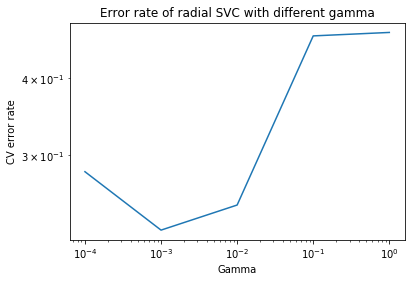

Error rate of optimal gamma: 0.22689


In [32]:
plt.loglog(gammas, svm_gamma_errs)
plt.title('Error rate of radial SVC with different gamma')
plt.xlabel('Gamma')
plt.ylabel('CV error rate')
plt.show()
print('Error rate of optimal gamma: {:.5f}'.format(min(svm_gamma_errs)))

In [25]:
# tuning degree and gamma in polynomial SVC and calculate CV error rates
degrees = np.arange(2, 7, 1)
poly_svm_lst = []
poly_svm_errs = []
for gamma in gammas:
    errs_tmp = []
    svms_tmp = []
    for d in degrees:
        svc = svm.SVC(kernel='poly', degree=d, gamma=gamma)
        errs_tmp.append(1 - (cross_val_score(svc, x_train, y_train, cv=KFold(10), scoring='accuracy')).mean())
        svms_tmp.append(svc)
    poly_svm_lst.append(svms_tmp[np.argmin(errs_tmp)])
    poly_svm_errs.append(errs_tmp[np.argmin(errs_tmp)])

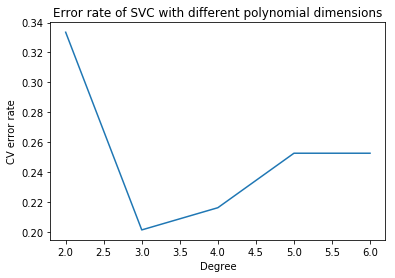

Error rate of optimal dimension: 0.20123


In [33]:
plt.plot(degrees, poly_svm_errs)
plt.title('Error rate of SVC with different polynomial dimensions')
plt.xlabel('Degree')
plt.ylabel('CV error rate')
plt.show()
print('Error rate of optimal dimension: {:.5f}'.format(min(poly_svm_errs)))

After tuning SVC with different parameters, the linear SVC yields the smallest error rate. Therefore, the best model is linear SVC with C=0.1.

In [34]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

best_model = svm.SVC(kernel='linear', C=0.1, probability=True).fit(x_train, y_train)
# calculate the feature importance
model = InMemoryModel(best_model.predict_proba, examples = x_train)
interpreter = Interpretation(x_train)
importance = interpreter.feature_importance.feature_importance(model)

2019-03-10 22:02:37,242 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[55/55] features ████████████████████ Time elapsed: 7 seconds

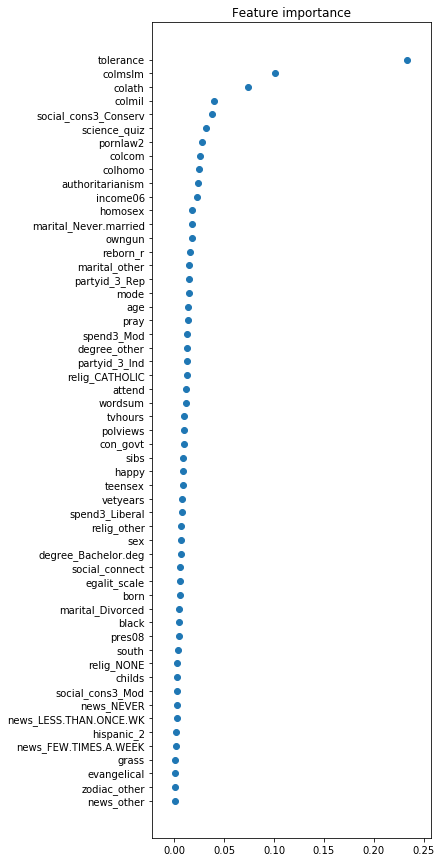

In [35]:
# plot the feature importance
features = np.array(gss_train.drop(['colrac'], axis=1).columns)
plt.figure(figsize=(5,15))
yrange = np.arange(0,len(features))
plt.scatter(importance, yrange)
plt.yticks(yrange, features[importance.index])
plt.title('Feature importance')
plt.show()

From the feature importance figure above, we can know that 'toletance', 'colmslm', 'colath', 'colmil' and  'social_cons3_Conserv' are the 5 most important features.

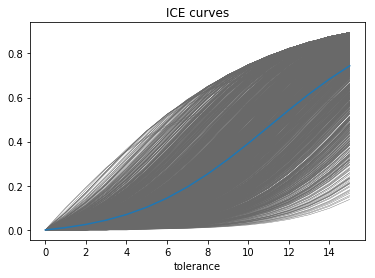

In [36]:
from pycebox.ice import ice, ice_plot

ice_data = gss_train.drop(['colrac'], axis=1)
pred_func = lambda x:best_model.predict_proba(x)[:,0]

# plot ICE curves and PDP of tolerance
ice_df = ice(ice_data, 'tolerance', pred_func)
ice_plot(ice_df, c='dimgray', linewidth=0.4, plot_pdp=True, centered=True)
plt.title('ICE curves')
plt.xlabel('tolerance')
plt.show()

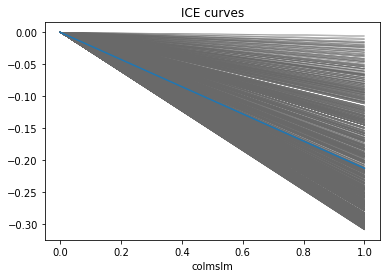

In [37]:
# plot ICE curves and PDP of colmslm
ice_df = ice(ice_data, 'colmslm', pred_func)
ice_plot(ice_df, c='dimgray', linewidth=0.4, plot_pdp=True, centered=True)
plt.title('ICE curves')
plt.xlabel('colmslm')
plt.show()

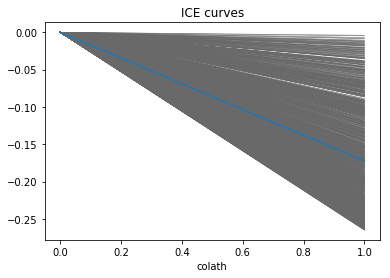

In [38]:
# plot ICE curves and PDP of colath
ice_df = ice(ice_data, 'colath', pred_func)
ice_plot(ice_df,c='dimgray', linewidth=0.5, plot_pdp=True, centered=True)
plt.title('ICE curves')
plt.xlabel('colath')
plt.show()

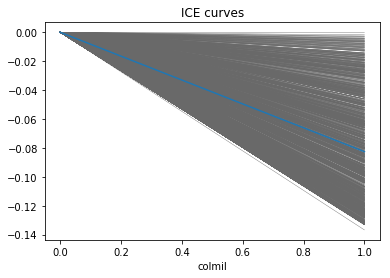

In [39]:
# plot ICE curves and PDP of colmil
ice_df = ice(ice_data, 'colmil', pred_func)
ice_plot(ice_df, c='dimgray', linewidth=0.4, plot_pdp=True, centered=True)
plt.title('ICE curves')
plt.xlabel('colmil')
plt.show()

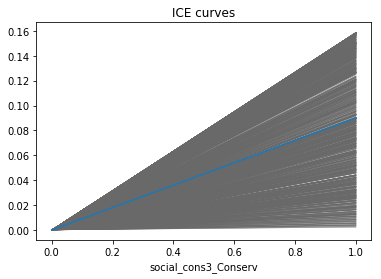

In [40]:
# plot ICE curves and PDP of social_cons3_Conserv
ice_df = ice(ice_data, 'social_cons3_Conserv', pred_func)
ice_plot(ice_df, c='dimgray', linewidth=0.4, plot_pdp=True, centered=True)
plt.title('ICE curves')
plt.xlabel('social_cons3_Conserv')
plt.show()

From the PDP and ICE plots above, we can see that 'colrac' increases as 'tolerance' and 'social_cons3_Conserv' becomes larger, and decreases when 'colmslm', 'colath', and 'colmil' increases. However, none of the features represents a significant individual dependence.

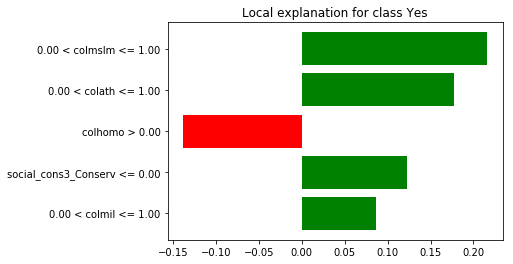

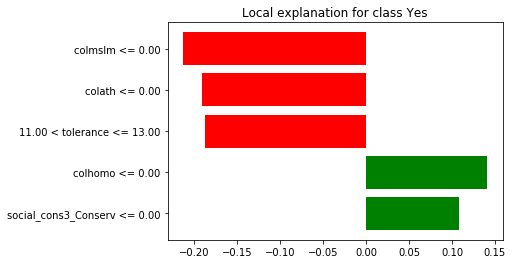

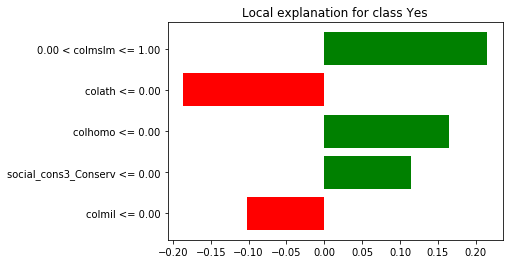

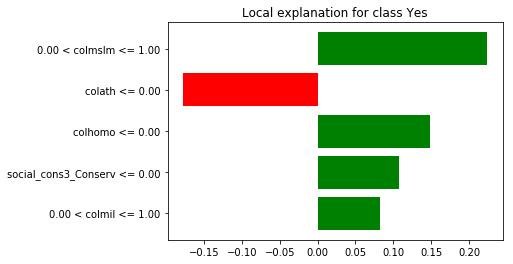

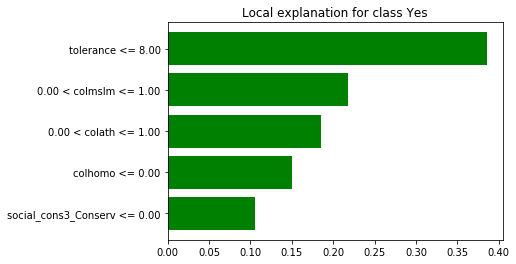

In [42]:
import lime
import lime.lime_tabular

# load the local data 
local = pd.read_csv('./data/gss_train.csv').drop(['colrac'], axis=1)
names = list(gss_train.drop(['colrac'], axis=1).columns)
predict_fn = lambda x:best_model.predict_proba(x)

# local surrogate model using the default hyperparameters for lime 
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names= names, 
                                                   class_names=['No', 'Yes'],  feature_selection='auto')

# plot the tuned Lime
for i in range(5):
    explainer.explain_instance(local.loc[i].values, predict_fn, num_features=5).as_pyplot_figure()

As shown in the LIMEs above, it turns out that 'colhomo' also becomes an important feature apart from the 5 most important features concluded above. In addition, the directions of local explaination of different features vary among different observations.